<a href="https://colab.research.google.com/github/princeserox/Aelle_App/blob/main/olusegun_ayodele_aelle_task_two_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation

We aim to accomplish the following for this Experiment:

Identify and visualize which factors or features that contribute to a customer defaulting on a loan:

Build a prediction model that will perform the following:

1.   Classify if a customer is going to deafult on loan payment or not
2.   Preferably and based on model performance, choose a model that will attach a probability to the loan default to make it easier for customer service to target customers who are likely to default a loan




*Load Packages*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from google.colab import files
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score, roc_curve, roc_auc_score
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from imblearn.over_sampling import SMOTE, SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb

Load the file

In [2]:
uploaded = files.upload()

Saving Default_Fin.csv to Default_Fin (2).csv


In [3]:
data = pd.read_csv('Default_Fin.csv')

In [4]:
data.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0


In [5]:
#Check Datatype 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [7]:
#rename columns for easy referencing and calling and also create the renamed column as a new dataset. 
df = data.rename({'Bank Balance': 'Bank_Balance', 'Annual Salary': 'Annual_Salary', 'Defaulted?' : 'Defaulted'}, axis=1) 

In [8]:
# In order to Perform EDA and have a Good Understanding of the Data Set. 

In [9]:
# Function to find percentage of missing in each feature.
def find_missing(data):
    count_missing = data.isnull().sum().values
    total = data.shape[0]
    percent_missing = (count_missing/total) * 100
    return pd.DataFrame(data = {'missing_count':count_missing, 'percent_missing': percent_missing},
                       index = data.columns.values)

find_missing(df)


,missing_count,percent_missing
Index,0,0.0
Employed,0,0.0
Bank_Balance,0,0.0
Annual_Salary,0,0.0
Defaulted,0,0.0


In [10]:
# great No errors 

In [11]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank_Balance   10000 non-null  float64
 3   Annual_Salary  10000 non-null  float64
 4   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [12]:
df.nunique()

Index            10000
Employed             2
Bank_Balance      9227
Annual_Salary     9989
Defaulted            2
dtype: int64

EDA

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Index,10000.0,5000.500000,2886.895680,1.00,2500.75,5000.50,7500.25,10000.00
Employed,10000.0,0.705600,0.455795,0.00,0.00,1.00,1.00,1.00
Bank_Balance,10000.0,10024.498524,5804.579486,0.00,5780.79,9883.62,13995.66,31851.84
Annual_Salary,10000.0,402203.782224,160039.674988,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted,10000.0,0.033300,0.179428,0.00,0.00,0.00,0.00,1.00


In [14]:
df.Employed.value_counts()

1    7056
0    2944
Name: Employed, dtype: int64

In [15]:
colours = ["navy", "gold", "maroon"]

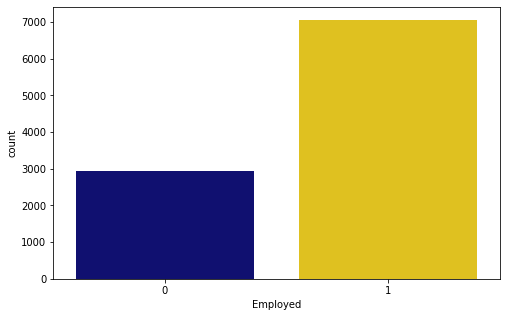

In [16]:
plt.figure(figsize=(8,5))
sns.countplot('Employed', data= df,palette=colours)

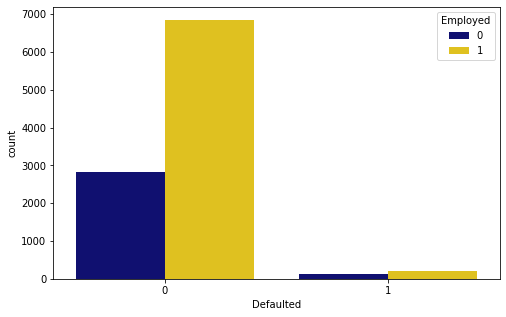

In [17]:
plt.figure(figsize=(8,5))
sns.countplot('Defaulted',hue = 'Employed', data= df,palette=colours)

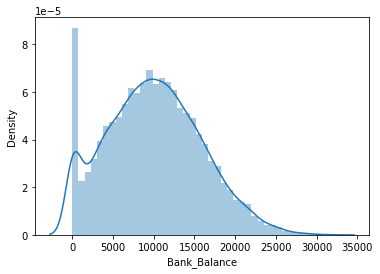

In [18]:
ax = sns.distplot(df['Bank_Balance'])

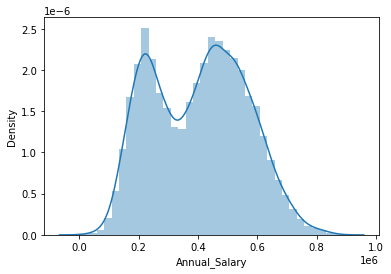

In [19]:
ax = sns.distplot(df['Annual_Salary'])

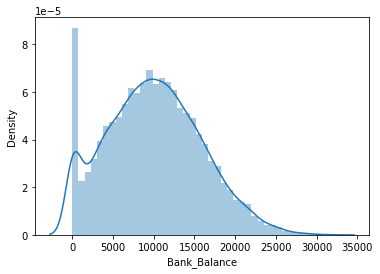

In [20]:
ax = sns.distplot(df['Bank_Balance'])

In [21]:
plt.figure(figsize = (10,7))

<Figure size 720x504 with 0 Axes>

<Figure size 720x504 with 0 Axes>

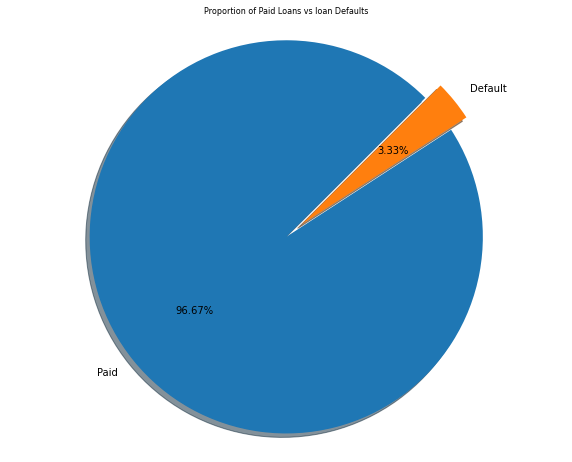

In [22]:
labels = 'Paid', 'Default'
sizes = [df.Defaulted[df['Defaulted']==0].count(), df.Defaulted[df['Defaulted']==1].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.2f%%',
        shadow=True, startangle=45)
ax1.axis('equal')
plt.title("Proportion of Paid Loans vs loan Defaults", size = 8)
plt.show()

At approximately 97%  to 3%, It is clear that the dataset is biased toward the class (0). In order to have a good model, we will need to handle the imbalance in the dataset using two approaches 
1. OverSampling 
2. Undersampling 

Due to the number of cases (especially the size of the minoruity class = 333)that we have for training. Oversampling is preferred as undersampling might not give the model enough diveristy. 

In [23]:
df.tail()

,Index,Employed,Bank_Balance,Annual_Salary,Defaulted
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0
9999,10000,0,2411.04,202355.40,0


Feature Engineering

Bank Balance is usually a factor of Period inflows, we are assuming that the salary is paid monthly, so a good comparison is to compare the bank average balance with the monthly salayry

In [24]:
df['monthly_salary'] = df.Annual_Salary/12

In [25]:
#compute an inflow retain rate that compares what percenatge of the salary get retained by the user 

In [26]:
df['ínflow_retention_rate'] = round(( df.Bank_Balance / df.monthly_salary), 2)

In [27]:
df.tail()

,Index,Employed,Bank_Balance,Annual_Salary,Defaulted,monthly_salary,ínflow_retention_rate
9995,9996,1,8538.72,635908.56,0,52992.38,0.16
9996,9997,1,9095.52,235928.64,0,19660.72,0.46
9997,9998,1,10144.92,703633.92,0,58636.16,0.17
9998,9999,1,18828.12,440029.32,0,36669.11,0.51
9999,10000,0,2411.04,202355.40,0,16862.95,0.14


In [28]:
#create a flag for retention rate above 0.5 as great and compare it to the customer potential for default 
df['ínflow_retention_flag'] = np.where(df['ínflow_retention_rate'] > 0.5, 'Good', 'Bad')

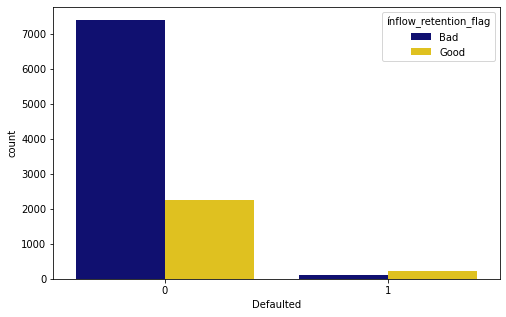

In [29]:
plt.figure(figsize=(8,5))
sns.countplot('Defaulted',hue = 'ínflow_retention_flag', data= df,palette=colours)

**Data Preprocessing**

In [30]:
# Import sklearn.preprocessing.StandardScaler


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

for col in df.select_dtypes('float64'):
    df[col]= scaler.fit_transform(df[col].values.reshape(-1,1))
    
df.head()

,Index,Employed,Bank_Balance,Annual_Salary,Defaulted,monthly_salary,ínflow_retention_rate,ínflow_retention_flag
0,1,1,0.274846,0.598905,0,0.598905,0.010132,Bad
1,2,0,0.307868,0.155727,0,0.155727,0.041033,Good
2,3,1,0.404454,0.425862,0,0.425862,0.020770,Bad
3,4,1,0.199392,0.479959,0,0.479959,0.009119,Bad
4,5,1,0.295993,0.517867,0,0.517867,0.012665,Bad


In [31]:

le = LabelEncoder()

leFeatures = ['ínflow_retention_flag']

for col in leFeatures:
    df[col] = le.fit_transform(df[col])

df.head()

,Index,Employed,Bank_Balance,Annual_Salary,Defaulted,monthly_salary,ínflow_retention_rate,ínflow_retention_flag
0,1,1,0.274846,0.598905,0,0.598905,0.010132,0
1,2,0,0.307868,0.155727,0,0.155727,0.041033,1
2,3,1,0.404454,0.425862,0,0.425862,0.020770,0
3,4,1,0.199392,0.479959,0,0.479959,0.009119,0
4,5,1,0.295993,0.517867,0,0.517867,0.012665,0


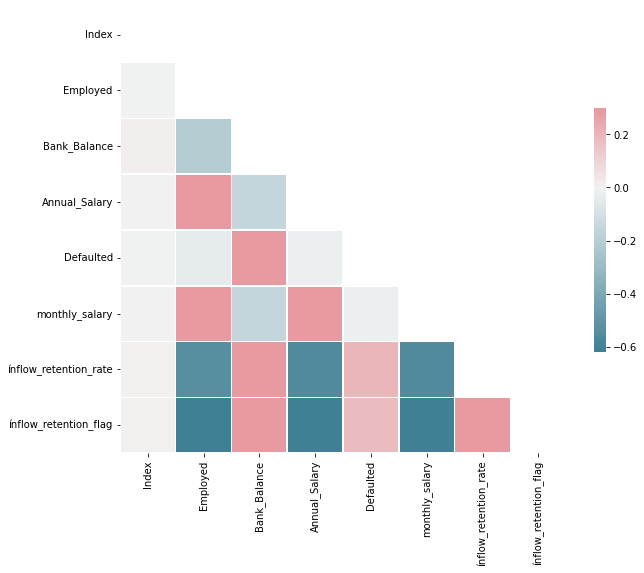

In [32]:
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [33]:

X = df.drop('Defaulted', axis=1)
X = pd.get_dummies(X)
y = df['Defaulted']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42)
columns = X_train.columns

**Handling Imbalanced Dataset with Class weight**

**XGBoost**

In [34]:

class_weight = int(y_train.value_counts()[0]/y_train.value_counts()[1])
class_weight

28

In [35]:
xgb = XGBClassifier(scale_pos_weight=class_weight,seed=42)
xgb.fit(X_train,y_train)


XGBClassifier(scale_pos_weight=28, seed=42)

In [36]:

print(f1_score(y_test,xgb.predict(X_test)))
print(accuracy_score(y_test,xgb.predict(X_test)))

0.29795918367346935
0.8853333333333333


In [37]:
print(confusion_matrix(y_test,xgb.predict(X_test)))
print(classification_report(y_test,xgb.predict(X_test)))

[[2583  323]
 [  21   73]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2906
           1       0.18      0.78      0.30        94

    accuracy                           0.89      3000
   macro avg       0.59      0.83      0.62      3000
weighted avg       0.97      0.89      0.92      3000



*Oversampling* 

Handle Imbalance Dataset using SMOTE

In [38]:

smote_algo = SMOTE(random_state=0, k_neighbors=10)
os_data_X, os_data_y = smote_algo.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y= pd.DataFrame(data=os_data_y, columns=["Defaulted"])

print('Length of Oversampled data is ', len(os_data_X))
print('Length of No Click in Oversampled data is ', len(os_data_y[os_data_y['Defaulted'] == 0]))
print('Length of Clicks in Oversampled data is ', len(os_data_y[os_data_y['Defaulted'] == 1]))

Length of Oversampled data is  13522
Length of No Click in Oversampled data is  6761
Length of Clicks in Oversampled data is  6761


In [39]:
os_X_train, os_X_val, os_y_train, os_y_val = train_test_split(os_data_X, os_data_y, test_size=0.3, random_state=123)

**Logistic Regression**

In [40]:
os_logreg_model = LogisticRegression(random_state=123, penalty='l2')
os_logreg_model.fit(os_X_train, os_y_train)
os_y_pred = os_logreg_model.predict(os_X_val)
print(confusion_matrix(os_y_val,os_y_pred))
print(classification_report(os_y_val,os_y_pred))

[[1835  199]
 [ 177 1846]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91      2034
           1       0.90      0.91      0.91      2023

    accuracy                           0.91      4057
   macro avg       0.91      0.91      0.91      4057
weighted avg       0.91      0.91      0.91      4057



In [41]:
os_logreg_pred = os_logreg_model.predict(X_test)
print(confusion_matrix(y_test,os_logreg_pred))
print(classification_report(y_test,os_logreg_pred))

[[2615  291]
 [  26   68]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2906
           1       0.19      0.72      0.30        94

    accuracy                           0.89      3000
   macro avg       0.59      0.81      0.62      3000
weighted avg       0.97      0.89      0.92      3000



**Random Forest**

In [42]:
os_rf_model = RandomForestClassifier(max_depth=8, n_estimators=100)
os_rf_model.fit(os_X_train, os_y_train)
os_rf_pred = os_rf_model.predict(os_X_val)
print(confusion_matrix(os_y_val,os_rf_pred))
print(classification_report(os_y_val,os_rf_pred))

[[1867  167]
 [ 124 1899]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2034
           1       0.92      0.94      0.93      2023

    accuracy                           0.93      4057
   macro avg       0.93      0.93      0.93      4057
weighted avg       0.93      0.93      0.93      4057



In [43]:
os_y_pred = os_rf_model.predict(X_test)
print(confusion_matrix(y_test,os_y_pred))
print(classification_report(y_test,os_y_pred))

[[2659  247]
 [  24   70]]
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      2906
           1       0.22      0.74      0.34        94

    accuracy                           0.91      3000
   macro avg       0.61      0.83      0.65      3000
weighted avg       0.97      0.91      0.93      3000



**LightGB Model**

In [44]:

os_d_train = lgb.Dataset(os_X_train, label=os_y_train)
params = {}
params['learning_rate'] = 0.0001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
params['num_leaves'] = 100
# params['min_data'] = 50
params['max_depth'] = 10

os_clf = lgb.train(params, os_d_train, 1000)
os_y_pred = os_clf.predict(os_X_val)

for i in range(0,len(os_y_val)):
    if os_y_pred[i]<0.5:
        os_y_pred[i]=0
    else:  
        os_y_pred[i]=1
        
print(confusion_matrix(os_y_val,os_y_pred))
print(classification_report(os_y_val,os_y_pred))

[[1879  155]
 [ 151 1872]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2034
           1       0.92      0.93      0.92      2023

    accuracy                           0.92      4057
   macro avg       0.92      0.92      0.92      4057
weighted avg       0.92      0.92      0.92      4057



In [45]:
os_test_pred = os_clf.predict(X_test)
for i in range(0,len(y_test)):
    if os_test_pred[i]<0.5:
        os_test_pred[i]=0
    else:  
        os_test_pred[i]=1
        
print(confusion_matrix(y_test,os_test_pred))
print(classification_report(y_test,os_test_pred))

[[2690  216]
 [  32   62]]
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      2906
           1       0.22      0.66      0.33        94

    accuracy                           0.92      3000
   macro avg       0.61      0.79      0.64      3000
weighted avg       0.96      0.92      0.94      3000



*MODEL OUTPUT - ANALYSIS*

Having experimented with Logistic Regression, Random Forest, and LightGB models, it can be obeserved that while both the Random Forest and LightGBM produce really good results on the oversampled validation set, performance deteriorates on the holdout test set.

This could point to a number of factors:

1. The model overfits the training set.
2. The oversampled test set is too similar to the test set and possibly same observations in the training set exist in the test set.

With more extensive experimentation and model parameter tuning, it might be possible to fix these issues.

**Handle Imbalance Dataset using UnderSampling**

In [46]:
minority_class_length = len(df[df['Defaulted'] == 1])
print(minority_class_length)

333


In [47]:
majority_class_indices = df[df['Defaulted'] == 0].index
print(majority_class_indices)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9990, 9991, 9992, 9993, 9994, 9995, 9996, 9997, 9998, 9999],
           dtype='int64', length=9667)


In [48]:
random_majority_indices = np.random.choice(majority_class_indices,minority_class_length, replace =False)
print(len(random_majority_indices))

333


In [49]:
minority_class_indices = df[df['Defaulted'] == 1].index
print(minority_class_indices)

Int64Index([ 136,  173,  201,  206,  209,  241,  243,  263,  341,  345,
            ...
            9796, 9813, 9856, 9883, 9893, 9912, 9921, 9949, 9951, 9978],
           dtype='int64', length=333)


In [50]:
minority_class_indices = list(minority_class_indices)
random_majority_indices = list(random_majority_indices)

In [51]:
under_sample_indices = minority_class_indices + random_majority_indices

In [52]:
un_data = df.loc[under_sample_indices]
un_data.head()

,Index,Employed,Bank_Balance,Annual_Salary,Defaulted,monthly_salary,ínflow_retention_rate,ínflow_retention_flag
136,137,0,0.560219,0.234706,1,0.234706,0.050659,1
173,174,0,0.831023,0.185478,1,0.185478,0.093718,1
201,202,0,0.668604,0.269125,1,0.269125,0.053191,1
206,207,1,0.711896,0.662032,1,0.662032,0.023303,0
209,210,0,0.715584,0.273188,1,0.273188,0.055724,1


In [53]:
X = un_data.drop('Defaulted', axis=1)
X = pd.get_dummies(X)
y = un_data['Defaulted']
cn_X_train, cn_X_val, cn_y_train, cn_y_val = train_test_split(X, y, test_size=0.3, random_state=123)

**Logistic Regression**

In [54]:
un_logreg_model = LogisticRegression(random_state=123, penalty='l2')
un_logreg_model.fit(cn_X_train, cn_y_train)
un_y_pred = un_logreg_model.predict(cn_X_val)
print(confusion_matrix(cn_y_val,un_y_pred))
print(classification_report(cn_y_val,un_y_pred))

[[72 17]
 [15 96]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        89
           1       0.85      0.86      0.86       111

    accuracy                           0.84       200
   macro avg       0.84      0.84      0.84       200
weighted avg       0.84      0.84      0.84       200



In [55]:
un_logreg_pred = un_logreg_model.predict(X_test)
print(confusion_matrix(y_test,un_logreg_pred))
print(classification_report(y_test,un_logreg_pred))

[[2518  388]
 [  14   80]]
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2906
           1       0.17      0.85      0.28        94

    accuracy                           0.87      3000
   macro avg       0.58      0.86      0.61      3000
weighted avg       0.97      0.87      0.91      3000



**Random Forrest**

In [56]:
un_rf_model = RandomForestClassifier(max_depth=8, n_estimators=100)
un_rf_model.fit(cn_X_train, cn_y_train)

RandomForestClassifier(max_depth=8)

In [57]:
un_y_pred = un_rf_model.predict(X_test)
print(confusion_matrix(y_test,un_y_pred))
print(classification_report(y_test,un_y_pred))

[[2499  407]
 [   5   89]]
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2906
           1       0.18      0.95      0.30        94

    accuracy                           0.86      3000
   macro avg       0.59      0.90      0.61      3000
weighted avg       0.97      0.86      0.90      3000



Light GB Model

In [58]:
un_d_train = lgb.Dataset(cn_X_train, label=cn_y_train)
params = {}
params['learning_rate'] = 0.0001
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
# params['sub_feature'] = 0.5
params['num_leaves'] = 100
# params['min_data'] = 50
params['max_depth'] = 10

un_clf = lgb.train(params, un_d_train, 1000)
un_y_pred = un_clf.predict(cn_X_val)

for i in range(0,len(cn_y_val)):
    if un_y_pred[i]<0.5:
        un_y_pred[i]=0
    else:  
        un_y_pred[i]=1
        
print(confusion_matrix(cn_y_val,un_y_pred))
print(classification_report(cn_y_val,un_y_pred))


[[77 12]
 [30 81]]
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        89
           1       0.87      0.73      0.79       111

    accuracy                           0.79       200
   macro avg       0.80      0.80      0.79       200
weighted avg       0.80      0.79      0.79       200



In [59]:
un_test_pred = un_clf.predict(X_test)
for i in range(0,len(y_test)):
    if un_test_pred[i]<0.5:
        un_test_pred[i]=0
    else:  
        un_test_pred[i]=1
        
print(confusion_matrix(y_test,un_test_pred))
print(classification_report(y_test,un_test_pred))

[[2618  288]
 [  31   63]]
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      2906
           1       0.18      0.67      0.28        94

    accuracy                           0.89      3000
   macro avg       0.58      0.79      0.61      3000
weighted avg       0.96      0.89      0.92      3000



**Model Output Analysis**

Having experimented with Logistic Regression, Random Forest, and LightGB models on the undersampled dataset, we can see that the model perform very well on the undersampled dataset but poorly on the hold out test. This is due to the fact that the undersample data is too small to represent the entire population. 

**Model Selection**

The Models Approach have similiar performance in term of accuracy and ability to genralise the training set. I am assuming that the aim of the experiment is to predict customer likely to defaul. To achive this further analysis will be done to the confusion matrix to select the model with the best performance using a cost based approach.

The Oversampled Random Forest Model is the best model in term of predicting one in a cost efficient manner

In [60]:
def cm_analysis(y_true, y_pred, labels, mod, ymap=None, figsize=(10,8), cmap=plt.cm.Blues):
    if ymap is not None:
        y_pred = [ymap[yi] for yi in y_pred]
        y_true = [ymap[yi] for yi in y_true]
        labels = [ymap[yi] for yi in labels]
    accuracy= mod.score(X_test, y_test)
    misclass = 1-accuracy
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    # cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap=cmap)
    plt.xlabel('Predicted \nAccuracy={:0.2f}; Misclassification={:0.2f}'.format(accuracy, misclass))
    plt.title('Model Confusion Matrix')
    plt.show()

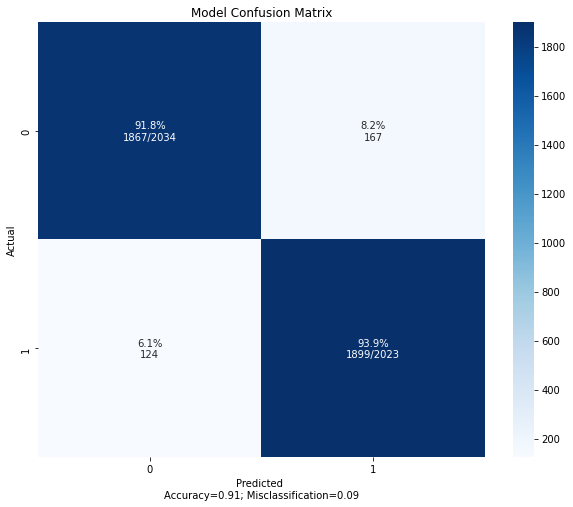

In [61]:
cm_analysis(y_true=os_y_val,
            y_pred=os_rf_pred,
            labels= [0, 1],
            mod=os_rf_model)

Further Approaches can also be used to revalidate the model performance, they are: 
1. AUC ROC
2. Youden Index

ROC AUC

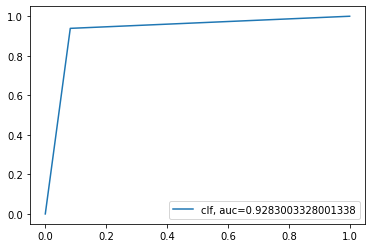

In [62]:
fpr, tpr, _ = roc_curve(os_y_val,  os_rf_pred)
auc = roc_auc_score(os_y_val, os_rf_pred)
plt.plot(fpr,tpr,label="clf, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Youden Index

In [63]:
clf_cm = confusion_matrix(os_y_val,os_rf_pred)
sensitivity = clf_cm[1,1]/ (clf_cm[1,1] +  clf_cm[1,0])
specificity = clf_cm[0,0]/ (clf_cm[0,0] +clf_cm[0,1])
Youden_Index = sensitivity + specificity -1
Youden_Index

0.8566006656002676

**Predictions**

In [79]:
df_features = df.drop('Defaulted', axis=1)
df_features = pd.get_dummies(df_features)
pred = os_rf_model.predict(df_features)
pred_prob = os_rf_model.predict_proba(df_features)

In [112]:
final_df = data.copy()
final_df.reset_index(drop=True, inplace=True)
final_df['predictions'] = pred
final_df['prediction_probabilities'] = pred_prob[:,1]

In [113]:
final_df.head()

,Index,Employed,Bank Balance,Annual Salary,Defaulted?,predictions,prediction_probabilities
0,1,1,8754.36,532339.56,0,0,0.016707
1,2,0,9806.16,145273.56,0,0,0.002143
2,3,1,12882.60,381205.68,0,0,0.055018
3,4,1,6351.00,428453.88,0,0,0.003266
4,5,1,9427.92,461562.00,0,0,0.007369
